## Observations and Insights 

In [40]:
#%matplotlib notebook

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [42]:
# Combine the data into a single dataset
# Display the data table for preview
#merge the above two raw frames and check for np.nan
pharmacy_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
pharmacy_df.dropna(how = "any")
pharmacy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
#The data for Mouse ID g989 looks has defects, however since when I drop duplicates keep the last one
#should be safe for my count Mouse ID, notice for the last timepoint 35, one one row value.
pharmacy_df.loc[pharmacy_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
#make a copy dataframe for working and keep the original one as a backup
phar_df = pharmacy_df.copy()
phar_df.head()
#phar_df["Mouse ID"].unique()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
phar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop duplicates and keep the lastone.
phar_df.drop_duplicates(subset =["Mouse ID"], keep = "last", inplace = True, ignore_index = True)
clean_df = phar_df.copy()
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [47]:
#Check there is no duplicate after drop duplicate
d = clean_df[clean_df.duplicated()]
d

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [48]:
#and check the mouse ID g989 is only one item
clean_df.loc[clean_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,35,62.57088,2


In [49]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
mice_number = clean_df["Mouse ID"].value_counts().sum()
mice_number

249

In [50]:
#prepare to form a Tumor_Volumn_statistics DataFrame
tumor_dict = {}
allregimenlist = []
regimenlist = clean_df["Drug Regimen"].unique()
regimenlist.sort()
regimenlist

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [51]:
#prepare to creat Tumor_Volumn_Statistics DataFrame
t_col = []

for i in regimenlist:
    one_df = clean_df.loc[phar_df["Drug Regimen"] == i, ["Tumor Volume (mm3)"]]
    t_col = one_df["Tumor Volume (mm3)"]
    tumor_dict = {"tumor_vol_mean":t_col.mean(), "tumor_vol_median":t_col.median(), "tumor_vol_Variance":t_col.var(), 
                  "tumor_vol_std_Dev":t_col.std(), "tumor_vol_SEM":t_col.sem()}
    allregimenlist.append(dict(tumor_dict))
 

In [52]:
#creat Tumor_Volumn_Statistics DataFrame
t_vol_df = pd.DataFrame(allregimenlist)   
#t_vol_df.head(20)

In [53]:
#Add Drug Regimen column to the Tumor_Volumn_Statistics DataFrame
t_vol_df["Drug Regimen"] = np.array(regimenlist) 

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#set index by Drug Regimen to the Tumor_Volumn_Statistics DataFrame
tumor_vol_df = t_vol_df.set_index("Drug Regimen")
tumor_vol_df


,tumor_vol_mean,tumor_vol_median,tumor_vol_Variance,tumor_vol_std_Dev,tumor_vol_SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
grouped_df = clean_df.groupby("Drug Regimen")
statistics_df =pd.DataFrame(index = regimenlist, columns = ["mean", "median","variance", "sta_dev","sem"])
statistics_df["mean"] =grouped_df["Tumor Volume (mm3)"].mean()
statistics_df["median"] = grouped_df["Tumor Volume (mm3)"].median()
statistics_df["variance"] = grouped_df["Tumor Volume (mm3)"].var()
statistics_df["sta_dev"] = grouped_df["Tumor Volume (mm3)"].std()
statistics_df["sem"] = grouped_df["Tumor Volume (mm3)"].sem()

statistics_df

,mean,median,variance,sta_dev,sem
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


## Bar and Pie Charts

In [56]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

grouped_phar_df = clean_df.groupby("Drug Regimen")
mice_of_treatment_df = grouped_phar_df["Mouse ID"].value_counts()

mice_dict = {}

for i in regimenlist:
    mice_dict[i] = mice_of_treatment_df.loc[i, :].sum()
    
mice_ser = pd.Series(mice_dict)
mice_ser

Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
dtype: int64

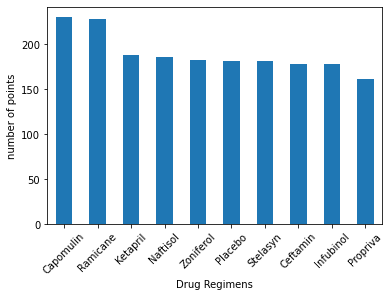

In [75]:
# Generate a bar plot showing the total number of data points, if required
counts = pharmacy_df["Drug Regimen"].value_counts()
counts.plot(kind = "bar")
plt.xlabel("Drug Regimens")
plt.xticks(rotation = 45)
plt.ylabel("number of points")
plt.show()

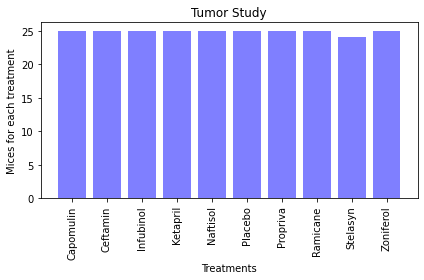

In [57]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = regimenlist
y = mice_ser
x_axis = np.arange(len(list(regimenlist)))
plt.xticks(x_axis, x, rotation = "vertical")
plt.bar(x_axis, y, facecolor = "blue", alpha = 0.5, align = "center")
plt.xlabel("Treatments")
plt.ylabel("Mices for each treatment")
plt.title("Tumor Study")
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

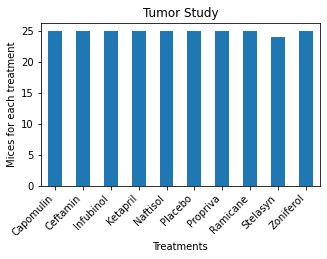

In [58]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig, ax = plt.subplots()

ax = mice_ser.plot(kind = "bar", figsize = (5, 3))
ax.set_xticklabels(x, rotation=45,horizontalalignment="right")
ax.set_xlabel("Treatments")
ax.set_ylabel("Mices for each treatment")
ax.set_title("Tumor Study")

plt.tight_layout


(-1.101994262617908,
 1.100094964886567,
 -1.1042684816700141,
 1.1534336851355051)

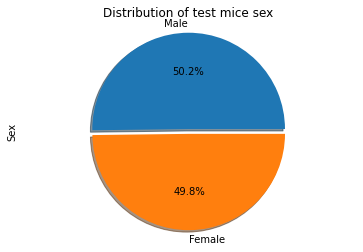

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_df = clean_df["Sex"].value_counts()
explode = [0.05, 0]
sex_list = sex_df.keys()
splot = sex_df.plot(kind = "pie", y = sex_list, explode = explode, autopct="%1.1f%%", shadow=True, startangle= 0  )
splot.set_title("Distribution of test mice sex")
plt.axis("equal")

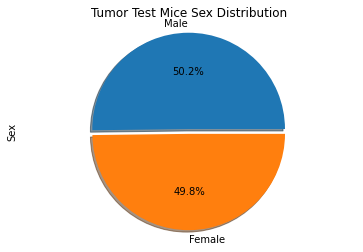

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df
sexs = sex_df.keys()
y = phar_df["Sex"].value_counts()
explode = (0, 0.05)
plt.title("Tumor Test Mice Sex Distribution")
plt.pie(y, explode=explode, labels=sexs, autopct="%1.1f%%", shadow=True, startangle= 0)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#Please noticed, during drop duplicates mice operation, I have already keep the last one, 
#so my greatest timepoint is automatically satisfied.
final_df = phar_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] =="Ramicane") |
                       (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin"), : ]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
#treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [63]:
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset   

Tumor_vol_list = []

for i in range(len(treat_list)):
    temp_list = (clean_df.loc[(clean_df["Drug Regimen"] == treat_list[i]), ["Tumor Volume (mm3)"]])
    Tumor_vol_list.append(temp_list)

#Tumor_vol_list[0]  

In [64]:
#Form the quartile_df with all the q1, q2, q3 for each of 4 treatments

q0 = Tumor_vol_list[0].quantile([.25,.5,.75]) # Calculate for the q1, q2, q3
q1 = Tumor_vol_list[1].quantile([.25,.5,.75])
q2 = Tumor_vol_list[2].quantile([.25,.5,.75])
q3 = Tumor_vol_list[3].quantile([.25,.5,.75])
q0.columns = [""] # remove the original column name
q1.columns = [""]
q2.columns = [""]
q3.columns = [""]
quartile_df = pd.DataFrame(q0) # form the quartile DataFrame with the first column 
quartile_df.columns = ["Capomulin"]
quartile_df["Ramicane"] = q1
quartile_df["Infubinol"] = q2
quartile_df["Ceftamin"] = q3

quartile_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.377357,31.560470,54.048608,48.722078
0.50,38.125164,36.561652,60.165180,59.851956
0.75,40.159220,40.659006,65.525743,64.299830


In [65]:
#Turn the quartile DataFRame 90 degree
tquar_df = quartile_df.T
tquar_df 

,0.25,0.50,0.75
Capomulin,32.377357,38.125164,40.159220
Ramicane,31.560470,36.561652,40.659006
Infubinol,54.048608,60.165180,65.525743
Ceftamin,48.722078,59.851956,64.299830


In [66]:
#complete the tquar_df by Calculate the IQR, Lower_Bound and Upper_bound

tquar_df["IQR"]  = tquar_df[0.75]- tquar_df[0.25]
tquar_df["Lower_bound"] = tquar_df[0.25]- tquar_df["IQR"] * 1.5
tquar_df["upper_bound"] = tquar_df[0.75] + tquar_df["IQR"] * 1.5
tquar_df

,0.25,0.5,0.75,IQR,Lower_bound,upper_bound
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


In [67]:
#Form 4 sub outlier_df and finally creat the general outlier_df
# Determine outliers using upper and lower bounds

#Shown below there is 1 possible outliers from Infubinol, Mouse ID = c326, Timepoint = 5, Tumor Volume (mm3) = 36.321346

outliers_df0 = final_df.loc[(final_df["Drug Regimen"] == "Capomulin") & ((final_df["Tumor Volume (mm3)"] < 20.704562) |
                          (final_df["Tumor Volume (mm3)"] > 51.832015))]
outliers_df1 = final_df.loc[(final_df["Drug Regimen"] == "Ramicane") & ((final_df["Tumor Volume (mm3)"] < 17.912664) |
                          (final_df["Tumor Volume (mm3)"] > 54.306811))]
outliers_df2 = final_df.loc[(final_df["Drug Regimen"] == "Infubinol") & ((final_df["Tumor Volume (mm3)"] < 36.832905) |
                          (final_df["Tumor Volume (mm3)"] > 82.741446 ))]
outliers_df3 = final_df.loc[(final_df["Drug Regimen"] == "Ceftamin") & ((final_df["Tumor Volume (mm3)"] < 25.355450 ) |
                          (final_df["Tumor Volume (mm3)"] > 87.666458))]

outliers_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
74,c326,Infubinol,Female,18,25,5,36.321346,0


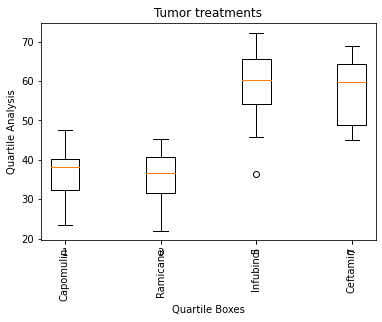

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(treat_list, rotation = "vertical")
ax1.set_xticks([1, 3, 5, 7])

ax1.set_title('Tumor treatments')
ax1.set_ylabel('Quartile Analysis')
ax1.set_xlabel("Quartile Boxes")
ax1.boxplot(Tumor_vol_list[0].values, positions =[1], widths = 0.6)
ax1.boxplot(Tumor_vol_list[1].values, positions = [3], widths = 0.6)
ax1.boxplot(Tumor_vol_list[2].values, positions = [5], widths = 0.6)
ax1.boxplot(Tumor_vol_list[3].values, positions = [7], widths = 0.6)
flierdrops = dict(marker = "o", markfacecolor = "blue", markersize = 12)

plt.show()

## Line and Scatter Plots

In [69]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = pharmacy_df.loc[pharmacy_df["Drug Regimen"] == "Capomulin", ["Mouse ID"]]
Capomulin_df["Mouse ID"].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

No handles with labels found to put in legend.


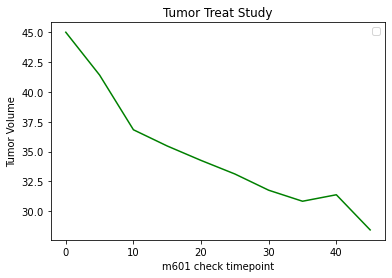

In [70]:
#Mouse ID m601 selected to plot time vs tumor volume and get result as follows:
m601_df = pharmacy_df.loc[pharmacy_df["Mouse ID"] == "m601", ["Timepoint", "Tumor Volume (mm3)"]]

plt.xlabel("m601 check timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Treat Study")
plt.legend(loc = "upper right")
m601plot, = plt.plot(m601_df["Timepoint"], m601_df["Tumor Volume (mm3)"], color = "green") 


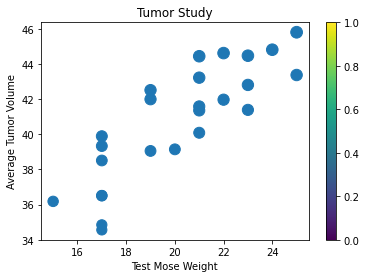

In [71]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_vol_df = pharmacy_df.loc[pharmacy_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
grouped_weight_vol_df = weight_vol_df.groupby("Mouse ID")
mean_df = grouped_weight_vol_df.mean()
plt.xlabel("Test Mose Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Tumor Study")
plt.scatter(mean_df["Weight (g)"], mean_df["Tumor Volume (mm3)"], marker = "o", cmap = 'RdPu', 
            s = mean_df["Tumor Volume (mm3)"] * 3, alpha =1)
cbar = plt.colorbar()

## Correlation and Regression

In [72]:
# Calculate the correlation coefficient and linear regression model 
correlation_coefficient = round(st.pearsonr(mean_df["Weight (g)"], mean_df["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between mice_weight and tumor_volume is {correlation_coefficient}")

The correlation coefficient between mice_weight and tumor_volume is 0.84


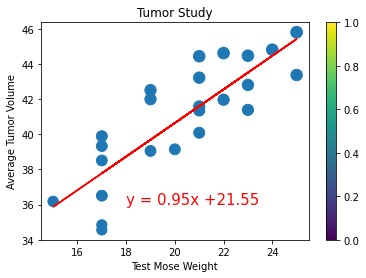

In [73]:
#Calculate linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

slope, int, r, p, std_err = st.linregress(mean_df["Weight (g)"], mean_df["Tumor Volume (mm3)"])
equition = mean_df["Weight (g)"] * slope + int
plt.scatter(mean_df["Weight (g)"], mean_df["Tumor Volume (mm3)"], marker = "o", cmap = 'RdPu', 
            s =mean_df["Tumor Volume (mm3)"] *3, alpha =1)
plt.plot(mean_df["Weight (g)"], equition, "r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(int,2))
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Test Mose Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Tumor Study")
cbar = plt.colorbar()